In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Ouverture et découpage de la vidéo en image (Inutile si on a déjà la vidéo découpé)

In [ ]:
!pip install pytube

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 KB 7.6 MB/s eta 0:00:00


In [ ]:
from pytube import YouTube

In [ ]:
yt = YouTube("https://www.youtube.com/watch?v=pJKOaMZyul8&t=3183s")
mp4_files = yt.streams.filter(file_extension="mp4")
mp4_720p_files = mp4_files.get_by_resolution("720p") # la qualité est importante pour bien lire le texte
mp4_720p_files.download("/content/drive/MyDrive/Projet Final") # réessayer jusqu'a que ca marche

In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2 
vidcap = cv2.VideoCapture("/content/drive/MyDrive/Projet Final/2021 SLS Super Crown World Championship  Mens FINAL  Full Broadcast.mp4") 
def getFrame(sec): 
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000) 
    hasFrames,image = vidcap.read() 
    if hasFrames: 
        cv2.imwrite("/content/drive/MyDrive/Projet Final/image/"+"frame "+str(sec)+" sec.jpg", image)     # save frame as JPG file 
    return hasFrames 
sec = 0 
frameRate = 0.5 # //it will capture image in each 0.5 second 
success = getFrame(sec) 
while success: 
    sec = sec + frameRate 
    sec = round(sec, 2) 
    success = getFrame(sec)

# Etude des frames 

## Test sur une image

In [ ]:
!sudo apt install tesseract-ocr

In [ ]:
!pip install pytesseract==0.3.9

In [ ]:
import cv2

In [ ]:
!pip install easyocr
import easyocr

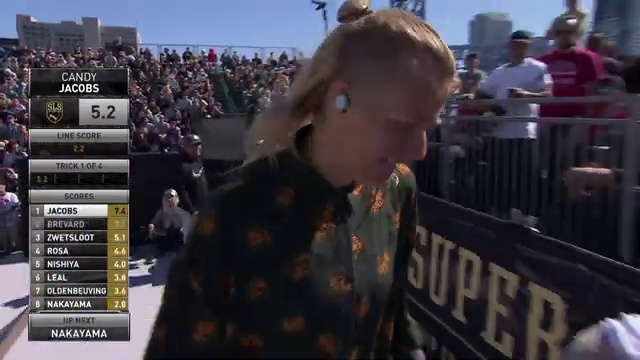

In [ ]:
import pytesseract
import matplotlib.pyplot as plt
from pytesseract import Output
from PIL import Image
from google.colab.patches import cv2_imshow

# Frame 11846
image = cv2.imread('/content/drive/MyDrive/Projet Final/imageF/frame 400.0 sec.jpg')
# Agrandir l'image en utilisant une proportion de 2
#image = cv2.resize(image, (0,0), fx=5, fy=5)
cv2_imshow(image)

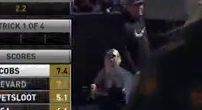

In [ ]:
cv2_imshow(image[140:250,58:260]) #image[200:250,58:260] = RUN ; image[140:250,58:260] = TRICKS ; image[245:295,70:250] = FINALE

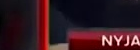

In [ ]:
cv2_imshow(image[245:295,70:215])

In [ ]:
text = pytesseract.image_to_string(image[200:250,58:260])
text

'JAGGER\n1=Vi0) |\n\x0c'

In [ ]:
text_reader = easyocr.Reader(['en']) #Initialzing the ocr

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
#gray = cv2.cvtColor(image[425:480,58:255], cv2.COLOR_BGR2GRAY)
#thresh=cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
results = text_reader.readtext(image)

In [ ]:
ath = []
for (bbox, text, prob) in results:
    ath.append(text)
for i in range(len(ath)):
   ath[i] = ath[i].replace(",",".")
ath

['CANDY',
 'Jacobs',
 'ECnRF',
 'TfCK LOF L',
 'scores',
 'JACOBS',
 'BATVARD',
 'ZWETSLOOT',
 'Po5',
 'NISHIYA',
 'Dloenanuint',
 'WakaMA',
 'Nakayama',
 '5.2',
 'SUPER']

In [ ]:
inter = ath[0].split(" ")[0:2]
for i in range(1,len(ath)):
  inter.append(ath[i])
print(inter)

In [ ]:
inter = ath[0].split(" ")[0:2] + [ath[i] for i in range(1,len(ath))]
inter

['TRicK', '2', '0.0', '0.0']

In [ ]:
base = ['TRicK', '0', '-1.0','-1.0','-1.0','-1.0']
float(base[1+int(base[1])]) > 0

False

In [ ]:
for i in range(len(inter)):
  base[i] = inter[i]
  if float(base[1+int(base[1])]) > 0:
    timefin.append(j)
base

['TRicK', '2', '0.0', '0.0', '-1.0', '-1.0']

In [ ]:
nombres = []

for element in ath:
    if isinstance(element, (int, float)):
        nombres.append(element)
    elif isinstance(element, str) and element.isdigit():
        nombres.append(int(element))
    elif isinstance(element, str) and "." in element:
        nombres.append(float(element))

print(nombres)

[9.5]


In [ ]:
nombres = [1,9.5]
(ath[0] == "LINE SCORE" and nombres[-1] != nombres[-2])

False

In [ ]:
t = []
t[0]

# Test algo frame-code 

## Avec Pytesseract sur image reduite

In [ ]:
# Pytesseract avec les prénoms


import numpy as np
# 4466 = derniere frame
athlete = ["JAGGER EATON","SHANE O'NEILL","KELVIN HOEFLER","LUCAS RABELO","GUSTAVO RIBEIRO","ALEX MIDLER","FELIPE GUSTAVO","NYJAH HUSTON",
           "JAGGER","EATON","SHANE","O'NEIL","KELVIN","HOEFLER","LUCAS","RABELO","GUSTAVO","RIBEIRO","ALEX","MIDLER","FELIPE","GUSTAVO",
           "NYJAH","HUSTON"]
nom_athlete = [""]
text_frame = []
time_frame = []
for i in np.arange(1, 4466):
  image = cv2.imread('/content/drive/MyDrive/Projet Final/image/'+"frame %d.0 sec.jpg" % i)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) ### Gray
  if len(time_frame) >= 0 and len(time_frame) < 8 :  # Run
    image = image[200:250,58:260]
  elif len(time_frame) >= 8 and len(time_frame) < 40 : # Tricks
    image = image[140:190,58:260]
  elif len(time_frame) >= 40 and len(time_frame) < 48 :# Final
    image = image[245:295,70:250]
  text = pytesseract.image_to_string(image)
  txt = text.split("\n")[0]
  text_frame.append(txt)
  if text_frame[-1] in athlete:
    nom_athlete.append(txt)
    if nom_athlete[-1] != nom_athlete[-2]:
      time_frame.append(i)

In [ ]:
print(time_frame)

[327, 454, 582, 676, 1024, 1119, 1220, 1320, 1657, 1721, 1743, 1797, 1855, 1887, 1926, 1961, 2021, 2051, 2112, 2140, 2206, 2256, 2289, 2333, 2601, 2639, 2696, 2726, 2792, 2863, 2915, 2941, 3003, 3045, 3115, 3148, 3208, 3293, 3393, 3444, 3781, 3844, 3889, 3920, 3948, 4032, 4099, 4129]


In [ ]:
print(nom_athlete)

['', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'JAGGER', 'SHANE', 'SHANE', 'SHANE', 'SHANE', 'SHANE', 'SHANE', 'SHANE', 'SHANE', 'SHANE', 'SHANE', 'SHANE', 'SHANE', 'SHANE', 'SHANE', 'SHANE', 'SHANE', 'SHANE', 'SHANE', 'KELVIN', 'KELVIN', 'KELVIN', 'KELVIN', 'KELVIN', 'KELVIN', 'LUCAS', 'LUCAS', 'LUCAS', 'LUCAS', 'LUCAS', 'LUCAS', 'LUCAS', 'LUCAS', 'LUCAS', 'LUCAS', 'LUCAS', 'LUCAS', 'LUCAS', 'LUCAS', 'LUCAS', 'LUCAS', 'LUCAS', 'LUCAS', 'LUCAS', 'LUCAS', 'LUCAS', 'LUCAS', 'LUCAS', 'LUCAS', 'LUCAS', 'LUCAS', 'LUCAS', 'GUSTAVO', 'GUSTAVO', 'GUSTAVO', 'GUSTAVO', 'GUSTAVO', 'GUST

In [ ]:
nom_ordre = []
for i in range(1,len(nom_athlete)):
  if nom_athlete[i-1] != nom_athlete[i]:
    nom_ordre.append(nom_athlete[i])
print(nom_ordre)

['JAGGER', 'SHANE', 'KELVIN', 'LUCAS', 'GUSTAVO', 'ALEX', 'FELIPE', 'NYJAH', 'FELIPE', 'GUSTAVO', 'ALEX', 'NYJAH', 'KELVIN', 'LUCAS', 'SHANE', 'JAGGER', 'FELIPE', 'GUSTAVO', 'ALEX', 'NYJAH', 'KELVIN', 'LUCAS', 'SHANE', 'JAGGER', 'FELIPE', 'GUSTAVO', 'ALEX', 'NYJAH', 'KELVIN', 'LUCAS', 'SHANE', 'JAGGER', 'FELIPE', 'GUSTAVO', 'ALEX', 'NYJAH', 'KELVIN', 'LUCAS', 'SHANE', 'JAGGER', 'LUCAS', 'NYJAH', 'GUSTAVO', 'JAGGER', 'LUCAS', 'NYJAH', 'GUSTAVO', 'JAGGER']


In [ ]:
import pandas as pd
x = np.array(["Run", "Tricks 1", "Tricks 2", "Tricks 3", "Tricks 4", "Tricks 5", "Tricks 6"])
type_course = np.repeat(x, [8, 8, 8, 8, 8, 4, 4], axis=0)
manche = ["Finale"]*48
timecode_2 = time_frame[1:48]
timecode_2.append(4466)
df = pd.DataFrame(list(zip(nom_ordre,time_frame,timecode_2,type_course,manche)), columns = ['Participant','Time debut','time fin','Prestation','Manche Competition'])
df

,Participant,Time debut,time fin,Prestation,Manche Competition
0,JAGGER,327,454,Run,Finale
1,SHANE,454,582,Run,Finale
2,KELVIN,582,676,Run,Finale
3,LUCAS,676,1024,Run,Finale
4,GUSTAVO,1024,1119,Run,Finale
5,ALEX,1119,1220,Run,Finale
6,FELIPE,1220,1320,Run,Finale
7,NYJAH,1320,1657,Run,Finale
8,FELIPE,1657,1721,Tricks 1,Finale
9,GUSTAVO,1721,1743,Tricks 1,Finale


## Avec Easy-OCR sur image reduite

In [ ]:
# ALGO complet avec temps de début et de fin en utilisant l'image réduite + que sur les prénoms

import numpy as np
# 4466 = derniere frame
athlete = ["JAGGER","EATON","SHANE","O'NEILL","KELVIN","HOEFLER","LUCAS",
           "RABELO","GUSTAVO","RIBEIRO","ALEX","MIDLER","FELIPE","GUSTAVO",
           "NYJAH","HUSTON"]
nom_athlete = [""]
nom_athlete_frame = [0,0]
text_frame = []
time_frame = []
time_frame_fin = []
text_reader = easyocr.Reader(['en']) #Initialzing the ocr
for i in np.arange(1, 4466):
  image = cv2.imread('/content/drive/MyDrive/Projet Final/image/'+"frame %d.0 sec.jpg" % i)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) ### Gray
  if len(time_frame) >= 0 and len(time_frame) < 8 :  # Run
    image = image[200:250,58:260]
  elif len(time_frame) >= 8 and len(time_frame) < 40 : # Tricks
    image = image[140:190,58:260]
  elif len(time_frame) >= 40 and len(time_frame) < 48 :# Final
    image = image[245:295,70:215]
  if len(time_frame) == 48:
    break
  results = text_reader.readtext(image)
  ath = []
  for (bbox, text, prob) in results:
    ath.append(text)
  txt = ' '.join(ath[0:1])
  text_frame.append(txt)
  if text_frame[-1] in athlete:
    nom_athlete.append(txt)
    nom_athlete_frame.append(i)
    if nom_athlete[-1] != nom_athlete[-2]:
      time_frame.append(i)
      if len(time_frame_fin) == 8 or len(time_frame_fin) == 40:
        time_frame_fin.append(nom_athlete_frame[-2]+50)
      else:
        time_frame_fin.append(nom_athlete_frame[-2])
time_frame_fin.append(time_frame[-1]+50)

In [ ]:
len(time_frame)

48

In [ ]:
print(time_frame)

[327, 452, 573, 676, 1024, 1110, 1220, 1315, 1656, 1721, 1743, 1793, 1822, 1887, 1925, 1961, 2021, 2051, 2112, 2140, 2191, 2255, 2289, 2332, 2601, 2638, 2696, 2723, 2786, 2863, 2915, 2941, 2999, 3045, 3114, 3148, 3205, 3293, 3393, 3444, 3778, 3843, 3888, 3920, 3948, 4032, 4099, 4129]


In [ ]:
print(time_frame_fin)

[0, 451, 572, 675, 774, 1109, 1219, 1314, 1365, 1719, 1741, 1791, 1821, 1886, 1924, 1960, 2020, 2049, 2110, 2139, 2190, 2254, 2288, 2331, 2379, 2636, 2695, 2722, 2785, 2862, 2913, 2939, 2998, 3044, 3113, 3147, 3204, 3291, 3392, 3442, 3494, 3841, 3886, 3918, 3947, 4031, 4098, 4128]


In [ ]:
time_frame_fin.append(time_frame[-1]+50)

In [ ]:
print(time_frame_fin)

[0, 451, 572, 675, 774, 1109, 1219, 1314, 1365, 1719, 1741, 1791, 1821, 1886, 1924, 1960, 2020, 2049, 2110, 2139, 2190, 2254, 2288, 2331, 2379, 2636, 2695, 2722, 2785, 2862, 2913, 2939, 2998, 3044, 3113, 3147, 3204, 3291, 3392, 3442, 3494, 3841, 3886, 3918, 3947, 4031, 4098, 4128, 4179]


In [ ]:
nom_ordre = []
for i in range(1,len(nom_athlete)):
  if nom_athlete[i-1] != nom_athlete[i]:
    nom_ordre.append(nom_athlete[i])
print(nom_ordre)

['JAGGER', 'SHANE', 'KELVIN', 'LUCAS', 'GUSTAVO', 'ALEX', 'FELIPE', 'NYJAH', 'FELIPE', 'GUSTAVO', 'ALEX', 'NYJAH', 'KELVIN', 'LUCAS', 'SHANE', 'JAGGER', 'FELIPE', 'GUSTAVO', 'ALEX', 'NYJAH', 'KELVIN', 'LUCAS', 'SHANE', 'JAGGER', 'FELIPE', 'GUSTAVO', 'ALEX', 'NYJAH', 'KELVIN', 'LUCAS', 'SHANE', 'JAGGER', 'FELIPE', 'GUSTAVO', 'ALEX', 'NYJAH', 'KELVIN', 'LUCAS', 'SHANE', 'JAGGER', 'LUCAS', 'NYJAH', 'GUSTAVO', 'JAGGER', 'LUCAS', 'NYJAH', 'GUSTAVO', 'JAGGER']


In [ ]:
prenom_ordre = ['JAGGER', 'SHANE', 'KELVIN', 'LUCAS', 'GUSTAVO', 'ALEX', 'FELIPE', 'NYJAH', 'FELIPE', 'GUSTAVO', 'ALEX', 'NYJAH', 'KELVIN', 'LUCAS', 'SHANE', 'JAGGER', 'FELIPE', 'GUSTAVO', 'ALEX', 'NYJAH', 'KELVIN', 'LUCAS', 'SHANE', 'JAGGER', 'FELIPE', 'GUSTAVO', 'ALEX', 'NYJAH', 'KELVIN', 'LUCAS', 'SHANE', 'JAGGER', 'FELIPE', 'GUSTAVO', 'ALEX', 'NYJAH', 'KELVIN', 'LUCAS', 'SHANE', 'JAGGER', 'LUCAS', 'NYJAH', 'GUSTAVO', 'JAGGER', 'LUCAS', 'NYJAH', 'GUSTAVO', 'JAGGER']
time_frame = [327, 452, 573, 676, 1024, 1110, 1220, 1315, 1656, 1721, 1743, 1793, 1822, 1887, 1925, 1961, 2021, 2051, 2112, 2140, 2191, 2255, 2289, 2332, 2601, 2638, 2696, 2723, 2786, 2863, 2915, 2941, 2999, 3045, 3114, 3148, 3205, 3293, 3393, 3444, 3778, 3843, 3888, 3920, 3948, 4032, 4099, 4129]
time_frame_fin = [0, 451, 572, 675, 774, 1109, 1219, 1314, 1365, 1719, 1741, 1791, 1821, 1886, 1924, 1960, 2020, 2049, 2110, 2139, 2190, 2254, 2288, 2331, 2379, 2636, 2695, 2722, 2785, 2862, 2913, 2939, 2998, 3044, 3113, 3147, 3204, 3291, 3392, 3442, 3494, 3841, 3886, 3918, 3947, 4031, 4098, 4128, 4179]
nom_ordre = [""]*len(prenom_ordre)
for i in range(len(prenom_ordre)):
  if prenom_ordre[i] == "JAGGER":
    nom_ordre[i] = "EATON"
  if prenom_ordre[i] == "SHANE":
    nom_ordre[i] = "O'NEILL"
  if prenom_ordre[i] == "KELVIN":
    nom_ordre[i] = "HOEFLER"
  if prenom_ordre[i] == "LUCAS":
    nom_ordre[i] = "RABELO"
  if prenom_ordre[i] == "GUSTAVO":
    nom_ordre[i] = "RIBEIRO"
  if prenom_ordre[i] == "ALEX":
    nom_ordre[i] = "MIDLER"
  if prenom_ordre[i] == "FELIPE":
    nom_ordre[i] = "GUSTAVO"
  if prenom_ordre[i] == "NYJAH":
    nom_ordre[i] = "HUSTON"
print(nom_ordre)

['EATON', "O'NEILL", 'HOEFLER', 'RABELO', 'RIBEIRO', 'MIDLER', 'GUSTAVO', 'HUSTON', 'GUSTAVO', 'RIBEIRO', 'MIDLER', 'HUSTON', 'HOEFLER', 'RABELO', "O'NEILL", 'EATON', 'GUSTAVO', 'RIBEIRO', 'MIDLER', 'HUSTON', 'HOEFLER', 'RABELO', "O'NEILL", 'EATON', 'GUSTAVO', 'RIBEIRO', 'MIDLER', 'HUSTON', 'HOEFLER', 'RABELO', "O'NEILL", 'EATON', 'GUSTAVO', 'RIBEIRO', 'MIDLER', 'HUSTON', 'HOEFLER', 'RABELO', "O'NEILL", 'EATON', 'RABELO', 'HUSTON', 'RIBEIRO', 'EATON', 'RABELO', 'HUSTON', 'RIBEIRO', 'EATON']


In [ ]:
for i in frame:
  if i in athlete:
    t.append(i)
  if len(list(set(t))) == 8:
    TRUE

In [ ]:
L=[1,1,2]
list(set(L))

[1, 2]

In [ ]:
import pandas as pd
x = np.array(["Run", "Tricks 1", "Tricks 2", "Tricks 3", "Tricks 4", "Tricks 5", "Tricks 6"])
type_course = np.repeat(x, [8, 8, 8, 8, 8, 4, 4], axis=0)
manche = ["Finale"]*48
timecode_2 = time_frame[1:48]
timecode_2.append(4466)
df = pd.DataFrame(list(zip(nom_ordre,time_frame,time_frame_fin[1:49],type_course,manche)), columns = ['Participant','Time debut','time fin','Prestation','Manche Competition'])
df

,Participant,Time debut,time fin,Prestation,Manche Competition
0,JAGGER,327,451,Run,Finale
1,SHANE,452,572,Run,Finale
2,KELVIN,573,675,Run,Finale
3,LUCAS,676,774,Run,Finale
4,GUSTAVO,1024,1109,Run,Finale
5,ALEX,1110,1219,Run,Finale
6,FELIPE,1220,1314,Run,Finale
7,NYJAH,1315,1365,Run,Finale
8,FELIPE,1656,1719,Tricks 1,Finale
9,GUSTAVO,1721,1741,Tricks 1,Finale


In [ ]:
import pandas as pd
import numpy as np
x = np.array(["Run", "Tricks 1", "Tricks 2", "Tricks 3", "Tricks 4", "Tricks 5", "Tricks 6"])
type_course = np.repeat(x, [8, 8, 8, 8, 8, 4, 4], axis=0)
manche = ["Finale"]*48
timecode_2 = time_frame[1:48]
timecode_2.append(4466)
df = pd.DataFrame(list(zip(prenom_ordre,nom_ordre,time_frame,time_frame_fin[1:49],type_course,manche)), columns = ['Prenom','Nom','Time_debut','Time_fin','Prestation','Manche_Competition'])
df

,Prenom,Nom,Time_debut,Time_fin,Prestation,Manche_Competition
0,JAGGER,EATON,327,451,Run,Finale
1,SHANE,O'NEILL,452,572,Run,Finale
2,KELVIN,HOEFLER,573,675,Run,Finale
3,LUCAS,RABELO,676,774,Run,Finale
4,GUSTAVO,RIBEIRO,1024,1109,Run,Finale
5,ALEX,MIDLER,1110,1219,Run,Finale
6,FELIPE,GUSTAVO,1220,1314,Run,Finale
7,NYJAH,HUSTON,1315,1365,Run,Finale
8,FELIPE,GUSTAVO,1656,1719,Tricks 1,Finale
9,GUSTAVO,RIBEIRO,1721,1741,Tricks 1,Finale


In [ ]:
# ALGO POUR UIILISER LES NOTES COMME INDICATEUR DE FIN DES RUNS

import numpy as np
import pandas as pd
# 4466 = derniere frame    SHANE 0'NEILL
athlete = ["JAGGER EATON","SHANE O'NEILL","KELVIN HOEFLER","LUCAS RABELO","GUSTAVO RIBEIRO","ALEX MIDLER","FELIPE GUSTAVO","NYJAH HUSTON"]

nom_athlete = [""]
text_frame = []
time_frame = []
nombres = []
for i in np.arange(400, 547):
  image = cv2.imread('/content/drive/MyDrive/Projet Final/image/'+"frame %d.0 sec.jpg" % i)
  # Lecture du carré avec EasyOCR
  result = text_reader.readtext(image[315:375,70:250])
  ath = []
  for (bbox, text, prob) in result:
    ath.append(text)
  text_frame.append(ath)
  for element in ath:
    if isinstance(element, (int, float)):
        nombres.append(element)
    elif isinstance(element, str) and element.isdigit():
        nombres.append(int(element))
    elif isinstance(element, str) and "." in element:
        nombres.append(float(element))
  #if len(ath)>0:
   # if ath[0] == "LINE SCORE":
     # if nombres[-1] != nombres[-2]:
       # time_frame.append(i)  
for j in range(len(nombres)):
  if nombres[j-1] != nombres[j]:
    time_frame.append(j)
print(time_frame)

[0, 4, 5, 7, 8, 13]


In [ ]:
import numpy as np
# ALGO POUR UTILISER "UP NEXT" COMME INDICATION DE TEMPS DE FIN

athlete = ["JAGGER EATON","SHANE O'NEILL","KELVIN HOEFLER","LUCAS RABELO","GUSTAVO RIBEIRO","ALEX MIDLER","FELIPE GUSTAVO","NYJAH HUSTON",
           "JAGGER","EATON","SHANE","O'NEILL","KELVIN","HOEFLER","LUCAS","RABELO","GUSTAVO","RIBEIRO","ALEX","MIDLER","FELIPE","GUSTAVO",
           "NYJAH","HUSTON","O","NEILL","O NEILL"]
nom_athlete = [""]
text_frame = []
time_frame = []
nombres = []
final = [0,0]
text_reader = easyocr.Reader(['en']) #Initialzing the ocr
for i in np.arange(1, 4466):
  image = cv2.imread('/content/drive/MyDrive/Projet Final/image/'+"frame %d.0 sec.jpg" % i)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) ### Gray
  image1 = image[630:680,110:205]
  results = text_reader.readtext(image1)
  ath = []
  for (bbox, text, prob) in results:
    ath.append(text)
  if len(ath) > 0 and ath[0] == "UP NEXT":    
    text_frame.append(ath[1].replace("0","").replace(" ","").replace("'",""))
    if text_frame[-1] in athlete:
      nom_athlete.append(text_frame[-1])
      if nom_athlete[-1] != nom_athlete[-2]:
        time_frame.append(i)
  if len(time_frame) == 7: 
          image2 = image[320:370,58:260]
          results = text_reader.readtext(image2)
          ath = []
          for (bbox, text, prob) in results:
            ath.append(text)
          if len(ath) > 0 and ath[0] == "LINE SCORE":
            for element in ath:
              if isinstance(element, (int, float)):
                nombres.append(element)
              elif isinstance(element, str) and element.isdigit():
                nombres.append(int(element))
              elif isinstance(element, str) and "." in element:
                nombres.append(float(element))
          if len(nombres) > 2 and nombres[-1] != nombres[-2]:
              time_frame.append(i)
  if len(time_frame) == 47 or len(time_frame) == 39: 
          image3 = image[630:680,110:205]
          results = text_reader.readtext(image3)
          ath = []
          for (bbox, text, prob) in results:
            ath.append(text)
          if len(ath) > 0 and ath[0] == "FINAL":
            final.append(1)
          if len(final) > 2 and final[-1] != final[-2]:
            time_frame.append(i)
  

In [ ]:
print(time_frame)

[425, 543, 668, 768, 1102, 1211, 1309, 1414, 1709, 1733, 1786, 1807, 1874, 1916, 1942, 2008, 2045, 2096, 2130, 2179, 2244, 2282, 2318, 2356, 2626, 2684, 2710, 2772, 2852, 2905, 2933, 2990, 3034, 3106, 3132, 3192, 3271, 3375, 3437, 3437, 3695, 3871, 3909, 3939, 4023, 4077, 4128, 4128]


In [ ]:
nombres

[4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 6.8, 5.2]

## Avec Easy-OCR sur image totale

In [ ]:
# ALGORITHME BONNE FRAME

athlete = ["JAGGER EATON","SHANE NEILL","KELVIN HOEFLER","LUCAS RABELO","GUSTAVO RIBEIRO","ALEX MIDLER","FELIPE GUSTAVO","NYJAH HUSTON"]
athletes_finaliste = ["JAGGER EATON","LUCAS RABELO","GUSTAVO RIBEIRO", "NYJAH HUSTON"	]

def bonne_frame(athlete,  athletes_finaliste,list_c):
  list_comparaison = []
  athlete2 = []
  athletes_finaliste2 = []
  athlete = (" ".join(athlete))
  athlete = athlete.split()
  athletes_finaliste = (" ".join(athletes_finaliste))
  athletes_finaliste = athletes_finaliste.split()
  list_result = [] # initialisation de la liste contenant les True or False pour indiquer si les element de athlete sont a l'interieur de la list comparaison

  
  bonne_frame = True
  
  for i in range(1,len(athlete),2):
    athlete2.append(athlete[i])
  for i in range(1,len(athletes_finaliste),2):
    athletes_finaliste2.append(athletes_finaliste[i])
  if len(list_c) > 0:
    for i in list_c:
      if i == "SCORES" or i == "scones" or i == "scores" :
        for x in np.arange(list_c.index(i),len(list_c)):
          list_comparaison.append(list_c[x])
  #print(res)
    for i in athlete2 :   # on verfie si tout nos participant sont dans la liste contenue dans le carré des nom
      for j in list_comparaison:
        if i  != j:
          list_result.append(False)
        else:
          list_result.append(True)
    if sum(list_result)   >= len(athlete2): #sum() pour compter le nombre de true == le nombres de nos atheletes se trouvant dans la liste de comparaison 
      bonne_frame = True
    else :
      bonne_frame = False 
    
    if bonne_frame == False:
      list_result = []
      for i in athletes_finaliste2:
        for j in list_comparaison:
          if i  != j:
            list_result.append(False)
          else:
            list_result.append(True)
      if sum(list_result)   >= len(athletes_finaliste2): #sum() pour compter le nombre de true == le nombres de nos atheletes finalistes se trouvant dans la liste de comparaison 
          bonne_frame = True
      else :
          bonne_frame = False
  return bonne_frame

In [ ]:
# ALGO SUR L IMAGE TOTAL AVEC EASYOCR + NOM_PRENOM + LES TEMPS DE FIN SONT LES TEMPS DE DEBUT DE LA PROCHAIN PRESTATION

import numpy as np
athlete = ["JAGGER EATON","SHANE NEILL",
           "KELVIN HOEFLER","LUCAS RABELO",
           "GUSTAVO RIBEIRO","ALEX MIDLER",
           "FELIPE GUSTAVO","NYJAH HUSTON"]
athletes_finaliste = ["JAGGER EATON","LUCAS RABELO","GUSTAVO RIBEIRO", "NYJAH HUSTON"	]
nom_athlete =  [""]
text_frame = []
result = []
time_frame = []
text_reader =easyocr.Reader(['en']) # Initialisation de easy ocr

for y in np.arange(1,4466):
  nom_prenom = []
  text = []
  image = cv2.imread('/content/drive/MyDrive/Projet Final/image/'+"frame %d.0 sec.jpg" % y)
  #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) ### Gray
  result = text_reader.readtext(image)
  # Recuper le text sous une liste 
  for (bbox, txt, prob) in result:
    text.append(txt)
  for z in text:
      j=z.replace(" ", "").replace("0","O").replace("'"," ")
      text[text.index(z)] = j
  if len(text) > 0:
    for i in text:
       if " " in i:
         j=i.split()
         for v in j:
           text.append(v)
  if bonne_frame(athlete,athletes_finaliste,text):
    nom_prenom = (' '.join(text[0:2]))
      # On prends le nom et le prenom seulement, d'apres la sortie de result
    text_frame.append(nom_prenom)
    if text_frame[-1] in athlete:
      nom_athlete.append(nom_prenom)
      if nom_athlete[-1] != nom_athlete[-2]:
        time_frame.append(y)
print(time_frame)
print(nom_athlete)

# Découpage de la vidéo avec le tableau

In [ ]:
!pip install imageio_ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 36.6 MB/s eta 0:00:00


In [ ]:
from moviepy.video.io.VideoFileClip import VideoFileClip
import os

# Chemin de la vidéo d'origine
video_path = "/content/drive/MyDrive/Projet Final/2021 SLS Super Crown World Championship  Mens FINAL  Full Broadcast.mp4"

# Dossier de destination pour les séquences de vidéos
output_folder = "/content/drive/MyDrive/Projet Final/Vid_coupe"

#['Prenom','Nom','Time_debut','Time_fin','Prestation','Manche_Competition']

# Boucle sur chaque athlète
for i in range(0,48):
    # Nom de l'athlète
    nom = df.Nom[i].upper()
    prenom = df.Prenom[i].lower()
    # Nom de la prestation
    prestation = df.Prestation[i]
    # Nom de la manche
    manche = df.Manche_Competition[i]
    # Temps de début et de fin de la prestation
    t_debut = df.Time_debut[i]
    t_fin = df.Time_fin[i]
    # Extraction de la séquence de vidéo correspondante à la prestation
    clip = VideoFileClip(video_path).subclip(t_debut, t_fin)
    # Nom du fichier de sortie
    filename = f"{nom}_{prenom}_SLS2021WORLDCHAMPIONSHIP__{manche}_{prestation}.mp4"
    # Chemin du fichier de sortie
    filepath = os.path.join(output_folder, filename)
    # Sauvegarde de la séquence de vidéo
    clip.write_videofile(filepath)

[MoviePy] >>>> Building video /content/drive/MyDrive/Projet Final/Vid_coupe/EATON_jagger_SLS2021WORLDCHAMPIONSHIP__Finale_Run.mp4
[MoviePy] Writing audio in EATON_jagger_SLS2021WORLDCHAMPIONSHIP__Finale_RunTEMP_MPY_wvf_snd.mp3


100%|██████████| 2735/2735 [00:04<00:00, 558.64it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/drive/MyDrive/Projet Final/Vid_coupe/EATON_jagger_SLS2021WORLDCHAMPIONSHIP__Finale_Run.mp4



100%|██████████| 3717/3717 [06:04<00:00, 10.19it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/MyDrive/Projet Final/Vid_coupe/EATON_jagger_SLS2021WORLDCHAMPIONSHIP__Finale_Run.mp4 

[MoviePy] >>>> Building video /content/drive/MyDrive/Projet Final/Vid_coupe/O'NEILL_shane_SLS2021WORLDCHAMPIONSHIP__Finale_Run.mp4
[MoviePy] Writing audio in O'NEILL_shane_SLS2021WORLDCHAMPIONSHIP__Finale_RunTEMP_MPY_wvf_snd.mp3


100%|██████████| 2647/2647 [00:05<00:00, 527.06it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/drive/MyDrive/Projet Final/Vid_coupe/O'NEILL_shane_SLS2021WORLDCHAMPIONSHIP__Finale_Run.mp4



100%|██████████| 3597/3597 [05:37<00:00, 10.65it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/drive/MyDrive/Projet Final/Vid_coupe/O'NEILL_shane_SLS2021WORLDCHAMPIONSHIP__Finale_Run.mp4 



In [ ]:
import os
import numpy as np


img = []
height, width, layers = [],[],[]
size = ()

# Chemin de la vidéo d'origine
video_path = "/content/drive/MyDrive/Projet Final/2021 SLS Super Crown World Championship  Mens FINAL  Full Broadcast.mp4"

# Dossier de destination pour les séquences de vidéos
output_folder = "/content/drive/MyDrive/Projet Final/Vid_coupe"

#['Prenom','Nom','Time_debut','Time_fin','Prestation','Manche_Competition']

# Boucle sur chaque athlète
for i in range(0,48):
    # Nom de l'athlète
    nom = df.Nom[i].upper()
    prenom = df.Prenom[i].lower()
    # Nom de la prestation
    prestation = df.Prestation[i]
    # Nom de la manche
    manche = df.Manche_Competition[i]
    # Temps de début et de fin de la prestation
    t_debut = df.Time_debut[i]
    t_fin = df.Time_fin[i]
    # Extraction de la séquence de vidéo correspondante à la prestation
    img_array = []
    for i in range(t_debut,t_fin):
          filename = '/content/drive/MyDrive/Projet Final/image/'+"frame %d.5 sec.jpg" % i
          img = cv2.imread(filename)
          height, width, layers = img.shape
          size = (width,height)
          img_array.append(img)
    # Nom du fichier de sortie
    filename = f"{nom}_{prenom}_SLS2021WORLDCHAMPIONSHIP__{manche}_{prestation}.mp4"
    # Sortie
    out = cv2.VideoWriter(filename,cv2.VideoWriter_fourcc(*'MP4V'), 15, size)
    for i in range(len(img_array)):
      out.write(img_array[i])
    out.release()

In [ ]:
filename = '/content/drive/MyDrive/Projet Final/image/'+"frame %d.5 sec.jpg" % 3
print(filename)

/content/drive/MyDrive/Projet Final/image/frame 3.5 sec.jpg


# test reproductibilité de l’implémentation : vidéo des femmes

## Telecharge + frame

In [ ]:
yt = YouTube("https://www.youtube.com/watch?v=swqH86aPikU&t=773s")
mp4_files = yt.streams.filter(file_extension="mp4")
mp4_720p_files = mp4_files.get_by_resolution("720p") # la qualité est importante pour bien lire le texte
mp4_720p_files.download("/content/drive/MyDrive/Projet Final") # réessayer jusqu'a que ca marche

'/content/drive/MyDrive/Projet Final/2021 SLS Super Crown World Championship  Womens FINAL  Single Trick & Last Trick Section.mp4'

In [ ]:
import cv2 
vidcap = cv2.VideoCapture("/content/drive/MyDrive/Projet Final/2021 SLS Super Crown World Championship  Womens FINAL  Single Trick & Last Trick Section.mp4") 
def getFrame(sec): 
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000) 
    hasFrames,image = vidcap.read() 
    if hasFrames: 
        cv2.imwrite("/content/drive/MyDrive/Projet Final/imageF/"+"frame "+str(sec)+" sec.jpg", image)     # save frame as JPG file 
    return hasFrames 
sec = 0 
frameRate = 0.5 # //it will capture image in each 0.5 second 
success = getFrame(sec) 
while success: 
    sec = sec + frameRate 
    sec = round(sec, 2) 
    success = getFrame(sec)

## Test algo automatique

In [ ]:
# ALGO SUR L IMAGE TOTAL AVEC EASYOCR + NOM_PRENOM + LES TEMPS DE FIN SONT LES TEMPS DE DEBUT DE LA PROCHAIN PRESTATION

import numpy as np
athlete = ["PAMELA ROSA","RAYSSA LEAL",
           "MOMIJI NISHIYA","SAMARRIA BREVARD",
           "ROOS ZWETSLOOT","CANDY JACOBS",
           "FUNA NAKAYAMA","KEET OLDENBEUVING"]

athletes_finaliste = ["PAMELA ROSA","RAYSSA LEAL","MOMIJI NISHIYA", "SAMARRIA BREVARD"]

nom_athlete =  [""]
text_frame = []
result = []
time_frame = []
text_reader = easyocr.Reader(['en']) # Initialisation de easy ocr

for y in np.arange(300,600):
  nom_prenom = []
  text = []
  image = cv2.imread('/content/drive/MyDrive/Projet Final/imageF/'+"frame %d.0 sec.jpg" % y)
  #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) ### Gray
  result = text_reader.readtext(image)
  # Recuper le text sous une liste 
  for (bbox, txt, prob) in result:
    text.append(txt)
  for z in text:
      j=z.replace(" ", "").replace("0","O").replace("'"," ")
      text[text.index(z)] = j
  if len(text) > 0:
    for i in text:
       if " " in i:
         j=i.split()
         for v in j:
           text.append(v)
  if bonne_frame(athlete,athletes_finaliste,text):
    nom_prenom = (' '.join(text[0:2]))
      # On prends le nom et le prenom seulement, d'apres la sortie de result
    text_frame.append(nom_prenom)
    if text_frame[-1] in athlete:
      nom_athlete.append(nom_prenom)
      if nom_athlete[-1] != nom_athlete[-2]:
        time_frame.append(y)
print(time_frame)
print(nom_athlete)

[300, 356, 409, 461, 481, 540, 598]
['', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'SAMARRIA BREVARD', 'CANDY JACOBS', 'CANDY JACOBS', 'CANDY JACOBS', 'CANDY JACOBS', 'CANDY JACOBS', 'CANDY JACOBS', 'CANDY JACOBS', 'CANDY JACOBS', 'CANDY JACOBS', 'CANDY JACOBS', 'CANDY JACOBS', 'CANDY JACOBS', 'CANDY JACOBS', 'CANDY JACOBS', 'CANDY JACOBS', 'CANDY JACOBS', 'CANDY JACOBS', 'CANDY JACOBS', 'CANDY JACOBS', 'CANDY JACOBS', 'CANDY JACOBS', 'CA

Test concluant ca marche 